In [1]:
import pkp
import cpd
%matplotlib inline
plt.style.use(['mystyle-vega'])

In [2]:
print('PKP version: {}'.format(pkp.__version__))
print('CPD version: {}'.format(cpd.__version__))

PKP version: 2.1.0+2.g6e73e1b.dirty
CPD version: 0+untagged.20.g943de75.dirty


In [3]:
ua = {'C': 74.12, 'H': 4.96, 'O': 13.18, 'N': 1.45, 'S': 0}
pa = {'FC': 57, 'VM': 43, 'Ash': 0, 'Moist': 0}
p = 101325
coal = cpd.CPD(ultimate_analysis=ua, proximate_analysis=pa, pressure=p, 
               name='test')
operating_conditions = [[0, 600], [0.01, 1200], [0.02, 1200]]
coal.operating_conditions = operating_conditions

In [4]:
coal.set_parameters(dt=1e-6, dt_max=1e-4)
%time res = coal.run()

CPU times: user 292 ms, sys: 4 ms, total: 296 ms
Wall time: 290 ms


In [5]:
coal0 = pkp.CPD(ultimate_analysis=ua, proximate_analysis=pa, pressure=p, 
               name='test')
coal0.operating_conditions = operating_conditions

In [6]:
%time res0 = coal0.run()

CPU times: user 188 ms, sys: 28 ms, total: 216 ms
Wall time: 709 ms


In [7]:
%prun res = coal.run()

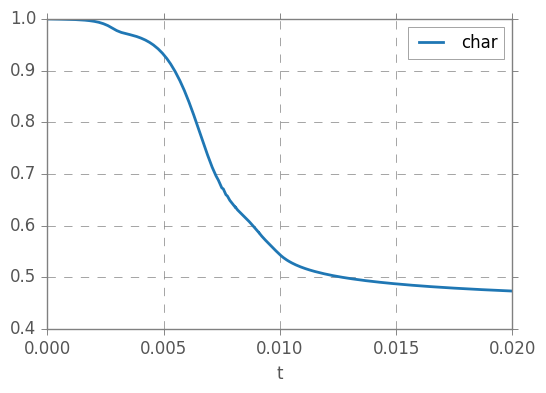

In [8]:
res.plot(x='t', y='char')